In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf

#### finance is a library that is connected with the yahoo finance's API; you can pullup datasets easily
here, i have tried to fetch that data of the APPLE

In [2]:
df = yf.Ticker("AAPL").history(period="1y")

In [3]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-14 00:00:00-05:00,240.203090,244.484433,239.944224,243.538559,40896200,0.0,0.0
2025-02-18 00:00:00-05:00,243.090500,244.116029,240.790527,243.409119,48822500,0.0,0.0
2025-02-19 00:00:00-05:00,243.598293,244.942425,242.104802,243.807373,32204200,0.0,0.0
2025-02-20 00:00:00-05:00,243.877092,245.709104,243.229904,244.763229,32316900,0.0,0.0
2025-02-21 00:00:00-05:00,244.882694,247.610809,244.155866,244.484436,53197400,0.0,0.0


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000,251.0
mean,234.983141,237.627027,232.506452,235.060821,5.406866e+07,0.004143,0.0
std,28.569840,28.283610,28.624595,28.420999,2.309340e+07,0.032625,0.0
min,171.203828,189.514001,168.475707,171.671768,1.791060e+07,0.000000,0.0
25%,209.377851,211.402704,207.277787,209.377846,4.130020e+07,0.000000,0.0
50%,234.089740,235.523493,230.410837,233.904175,4.806810e+07,0.000000,0.0
75%,260.096618,262.289989,257.743877,260.046661,5.625920e+07,0.000000,0.0
max,285.932471,288.350192,283.035157,285.922455,1.843959e+08,0.260000,0.0


In [5]:
df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

### Calcualting daily return 
.pct_change() calulates the percentage change from the previous row: [close(t) - close(t-1)] / [close(t-1)]

In [6]:
df['daily_return'] = df['Close'].pct_change()

In [7]:
#calulate volatility as standard deviation of daily returns

volatility = df['daily_return'].std()
print(f"Volatility (Standard Deviation of Daily Returns): {volatility:.4f}")
print(f"Annualized Volatility: {volatility * np.sqrt(252):.4f}")  # Assuming 252 trading days in a year

Volatility (Standard Deviation of Daily Returns): 0.0203
Annualized Volatility: 0.3221


In [8]:
# calulcating moving averge
df['7_day_MA'] = df['Close'].rolling(window=7).mean()

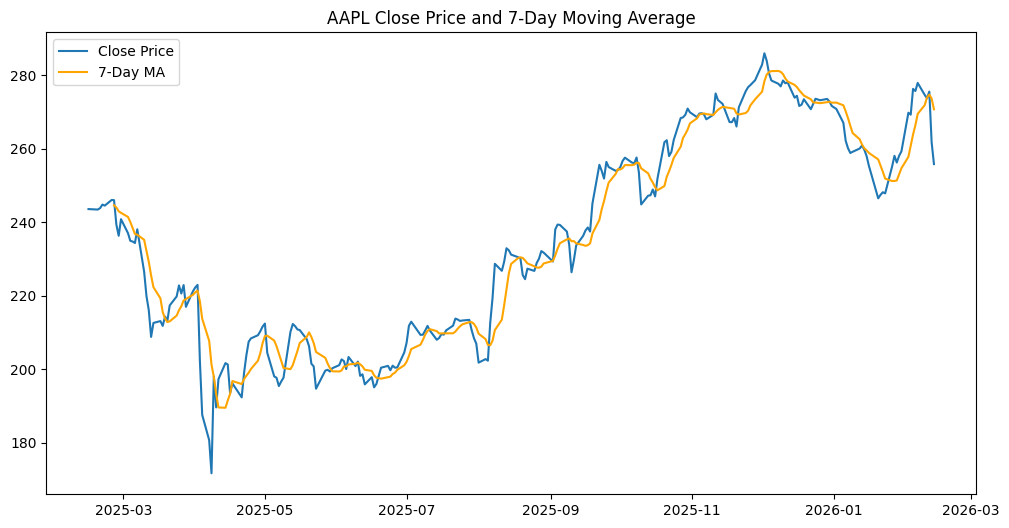

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['7_day_MA'], label='7-Day MA', color='orange')
plt.title('AAPL Close Price and 7-Day Moving Average')
plt.legend()
plt.show()

In [10]:
# 5️⃣ Calculate cumulative returns
df["Cumulative Return"] = (1 + df['daily_return']).cumprod() - 1  
# cumprod() multiplies all returns over time
# Subtract 1 to express as % gain/loss
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,7_day_MA,Cumulative Return
Date,,,,,,,,,,
2025-02-14 00:00:00-05:00,240.203090,244.484433,239.944224,243.538559,40896200,0.0,0.0,NaN,NaN,NaN
2025-02-18 00:00:00-05:00,243.090500,244.116029,240.790527,243.409119,48822500,0.0,0.0,-0.000531,NaN,-0.000531
2025-02-19 00:00:00-05:00,243.598293,244.942425,242.104802,243.807373,32204200,0.0,0.0,0.001636,NaN,0.001104
2025-02-20 00:00:00-05:00,243.877092,245.709104,243.229904,244.763229,32316900,0.0,0.0,0.003921,NaN,0.005029
2025-02-21 00:00:00-05:00,244.882694,247.610809,244.155866,244.484436,53197400,0.0,0.0,-0.001139,NaN,0.003884


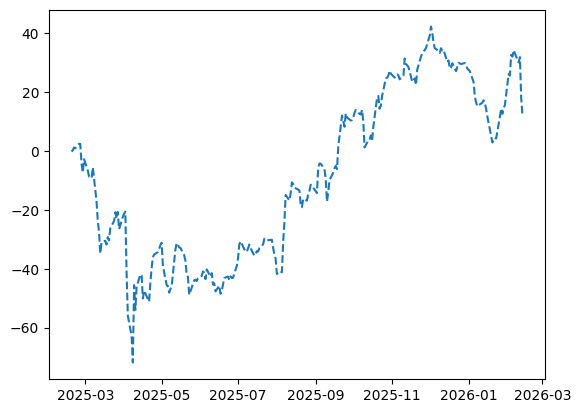

In [11]:
plt.plot(df["Cumulative Return"] * df["Close"].iloc[0], 
         label="Cumulative Return (scaled)", linestyle='--')

In [12]:
nvdia = yf.Ticker("NVDA").history(period="1y")

In [13]:
nvdia.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-14 00:00:00-05:00,136.442665,139.211911,135.462937,138.812027,195479600,0.0,0.0
2025-02-18 00:00:00-05:00,141.231376,143.400781,137.892278,139.361877,219176600,0.0,0.0
2025-02-19 00:00:00-05:00,139.471863,141.321363,137.182495,139.191940,167536000,0.0,0.0
2025-02-20 00:00:00-05:00,139.991721,140.621554,136.752601,140.071701,143903600,0.0,0.0
2025-02-21 00:00:00-05:00,140.001701,141.421326,133.993350,134.393234,228217600,0.0,0.0


In [14]:
nvdia['daily_return'] = nvdia['Close'].pct_change()

In [15]:
nvdia_volatiltiy = nvdia['daily_return'].std()
print(f"NVDA Volatility (Standard Deviation of Daily Returns): {nvdia_volatiltiy:.4f}")
print(f"NVDA Annualized Volatility: {nvdia_volatiltiy * np.sqrt(252):.4f}")  # Assuming 252 trading days in a year  

NVDA Volatility (Standard Deviation of Daily Returns): 0.0281
NVDA Annualized Volatility: 0.4460


In [16]:
nvdia['7_day_MA'] = nvdia['Close'].rolling(window=7).mean()

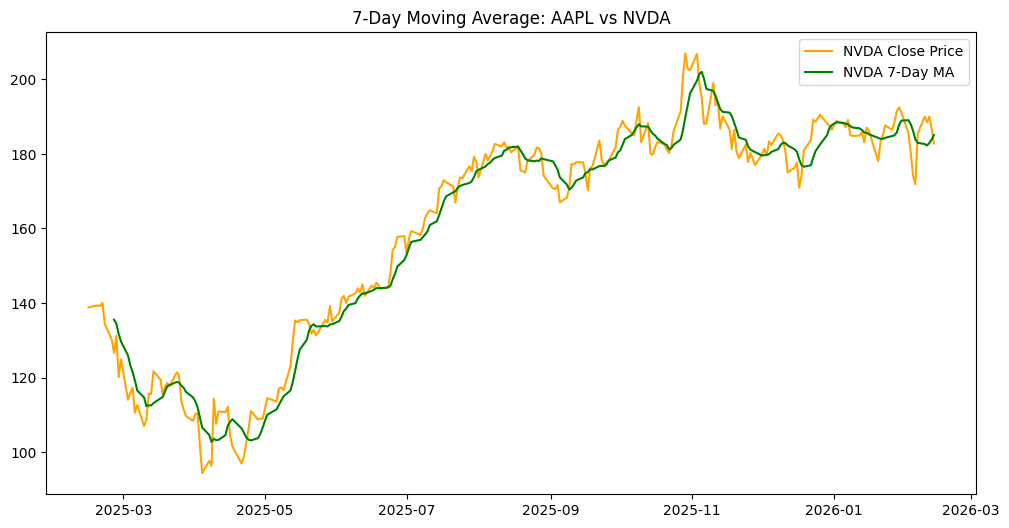

In [17]:
plt.figure(figsize=(12,6))
plt.plot(nvdia['Close'], label='NVDA Close Price', color='orange')
plt.plot(nvdia['7_day_MA'], label='NVDA 7-Day MA', color='green')
plt.title('7-Day Moving Average: AAPL vs NVDA')
plt.legend()
plt.show()

### Comaparing the graphs of two stocks:

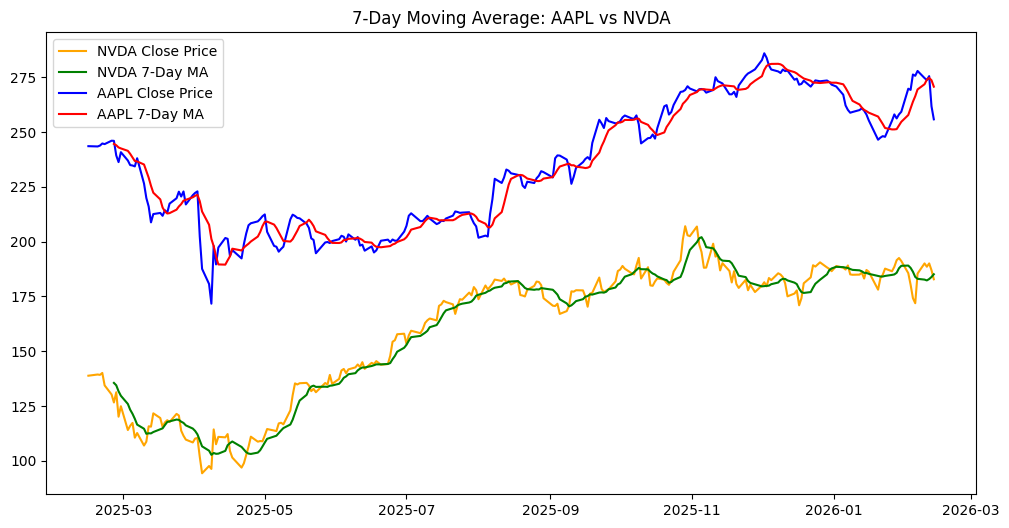

In [18]:
plt.figure(figsize=(12,6))
plt.plot(nvdia['Close'], label='NVDA Close Price', color='orange')
plt.plot(nvdia['7_day_MA'], label='NVDA 7-Day MA', color='green')


plt.plot(df['Close'], label='AAPL Close Price', color='blue')
plt.plot(df['7_day_MA'], label='AAPL 7-Day MA', color='red')
plt.title('7-Day Moving Average: AAPL vs NVDA')
plt.legend()
plt.show()

In [19]:
avg_daily_return_nvdia = nvdia['daily_return'].mean()
print(f"Average Daily Return for NVDA: {avg_daily_return_nvdia:.4f}")

avg_daily_return_aapl = df['daily_return'].mean()
print(f"Average Daily Return for AAPL: {avg_daily_return_aapl:.4f}")    

Average Daily Return for NVDA: 0.0015
Average Daily Return for AAPL: 0.0004


Analyzing NVIDIA and Apple shows that NVIDIA experienced higher volatility, with a daily standard deviation of 0.0281 and an annualized volatility of 0.4460, compared to Apple’s 0.0203 daily and 0.3221 annualized. In terms of returns, NVIDIA also outperformed, averaging a daily return of 0.15%, while Apple averaged about 0.04%.